In [2]:
import numpy as np

In [7]:
with open("avx2.raw", "rb") as f:
    y_avx2 = np.frombuffer(f.read(), dtype=np.float32)[500:1000]

with open("nop.raw", "rb") as f:
    y_nop = np.frombuffer(f.read(), dtype=np.float32)[497:997]

with open("baseline.raw", "rb") as f:
    y_baseline = np.frombuffer(f.read(), dtype=np.float32)[500:1000]


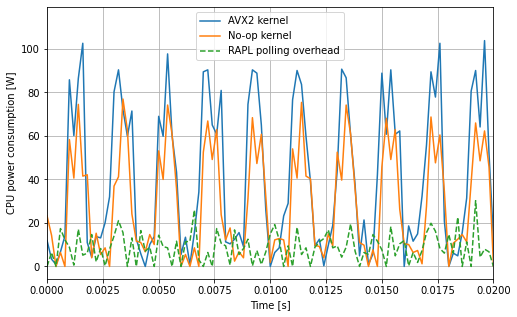

In [12]:
import matplotlib.pyplot as plt
fs = 5000
assert len(y_avx2) == len(y_nop)
x = np.arange(0, len(y_avx2)) / fs
plt.figure(1, figsize=(8, 5))
plt.plot(x, y_avx2, label="AVX2 kernel")
plt.plot(x, y_nop, label="No-op kernel")
plt.plot(x, y_baseline, label="RAPL polling overhead", linestyle='--')
plt.xlim((0, 0.02))
plt.legend()
plt.grid(True)
plt.ylabel("CPU power consumption [W]")
plt.xlabel("Time [s]")
# plt.ylim((0, 105))
plt.savefig("../figures/rapl_trace.pdf")
plt.show()

In [5]:
np.std(y_avx2)

33.823917

In [6]:
np.std(y_nop)

24.176664